<a href="https://colab.research.google.com/github/ShinYuJin9/Deep-learning-application/blob/main/1%EC%A3%BC%EC%B0%A8_%EB%A6%AC%ED%8F%AC%ED%8A%B8_1%EB%B2%88_202137544_%EC%8B%A0%EC%9C%A0%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 당뇨병 데이터를 가지고 머신러닝 5가지 분류를 수행 (SVM, LR, RF, DT, KNN)**

In [ ]:
# pandas, numpy, matplotlib.pyplot, tensorflow 라이브러리를 가져옴
# sklearn 라이브러리에서 train_test_split함수와 StandardScaler, LabelEncoder, KNeighborsClassifier, train_test_split를 가져옴
# StandardScaler: 데이터를 표준화하는 도구(평균 0, 분산 1)
# LabelEncoder: 범주형 데이터를 숫자형으로 변환
# KNeighborsClassifier: K-최근접 이웃(KNN) 알고리즘을 구현한 것
# train_test_split: 데이터를 학습용과 테스터용으로 나누는 데 사용
# seaborn 라이브러리를 가져옴
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [ ]:
# 파일을 읽고 데이터프레임(df)로 저장
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
# 데이터프레임 출력
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# 컬렴명 확인
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Outcome')

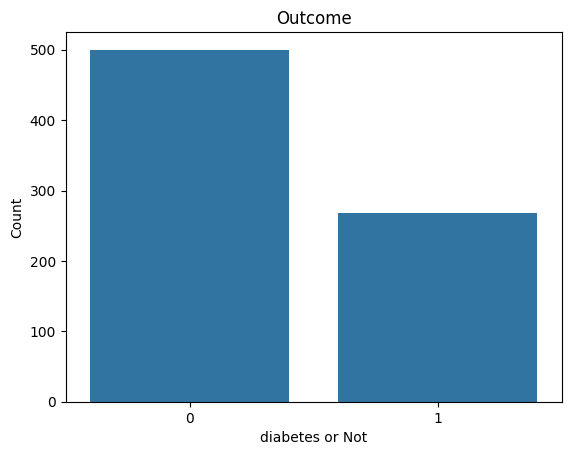

In [ ]:
# 결과 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("diabetes or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [ ]:
# 결과 갯수 확인 (숫자)
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
# 결측치 확인
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# 데이터프레임 출력
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<ipython-input-12-3fc8aa7020a1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'], kde = True, hist = False, ax=ax1)
<ipython-input-12-3fc8aa7020a1>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Glucose'], ax=ax2)


<Axes: xlabel='Glucose', ylabel='Density'>

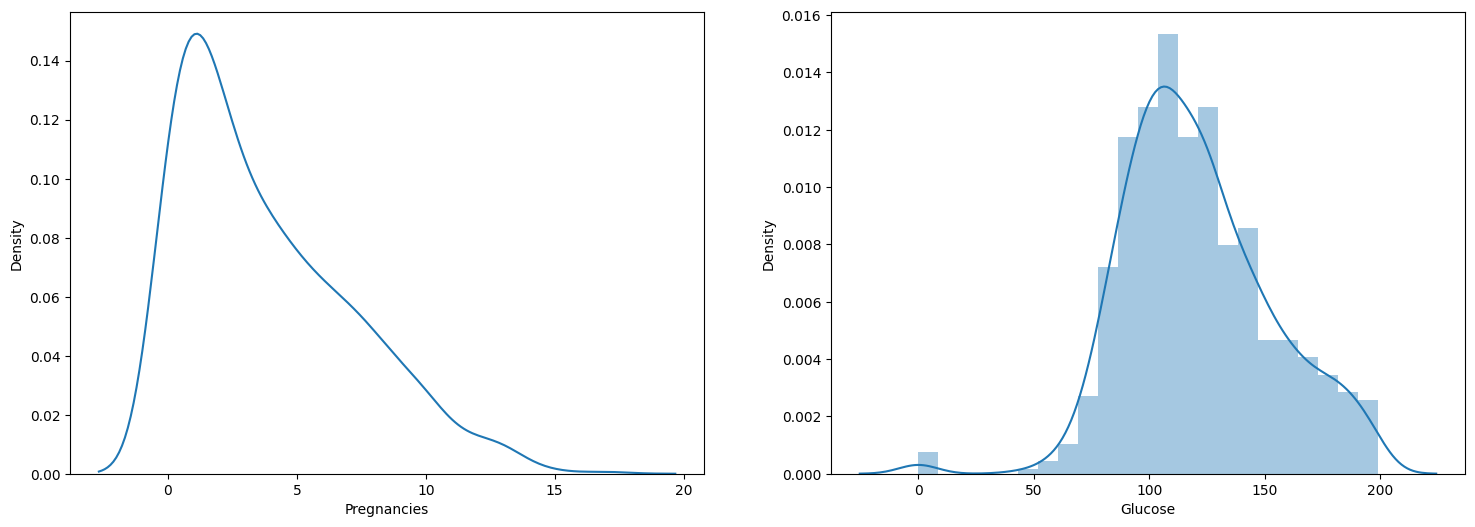

In [ ]:
# 컬럼별 히스토그램 확인
# 'Pregnancies'와'Glucose' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Pregnancies'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Glucose'], ax=ax2)

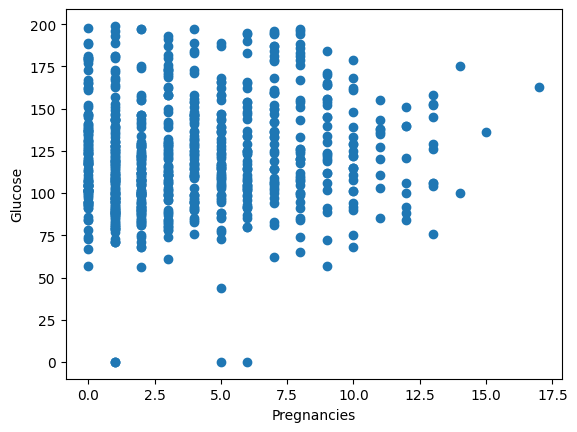

In [ ]:
# 산점도 확인
plt.scatter(df['Pregnancies'], df['Glucose'])
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')

plt.show()

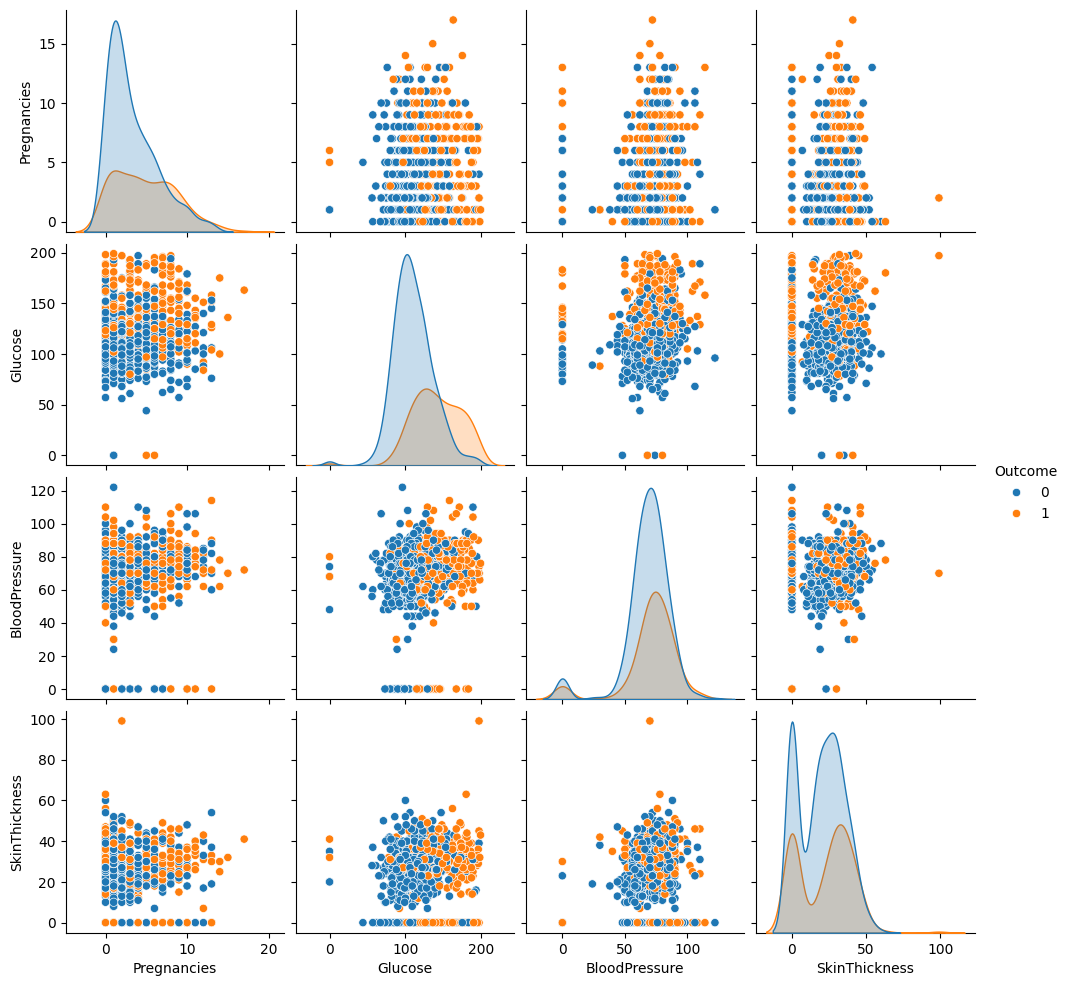

In [ ]:
# pairplot를 사용해 각 상관관계 살펴보기
sns.pairplot(df,
             vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'],
            hue ='Outcome')
plt.show()

<ipython-input-15-16cda4dea842>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pregnancies", data=df, palette="Set3")


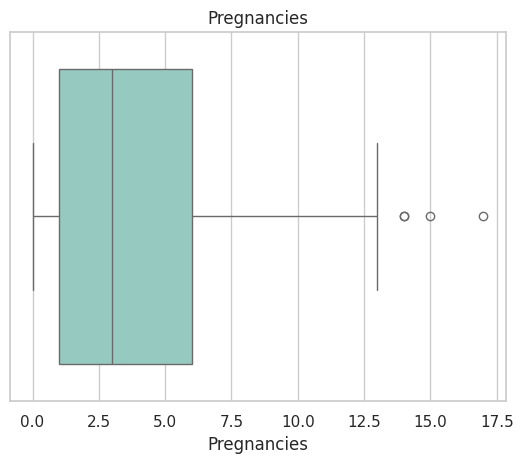

In [ ]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Pregnancies", data=df, palette="Set3")
plt.title("Pregnancies")
plt.show()

<ipython-input-16-59f636b60fdc>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


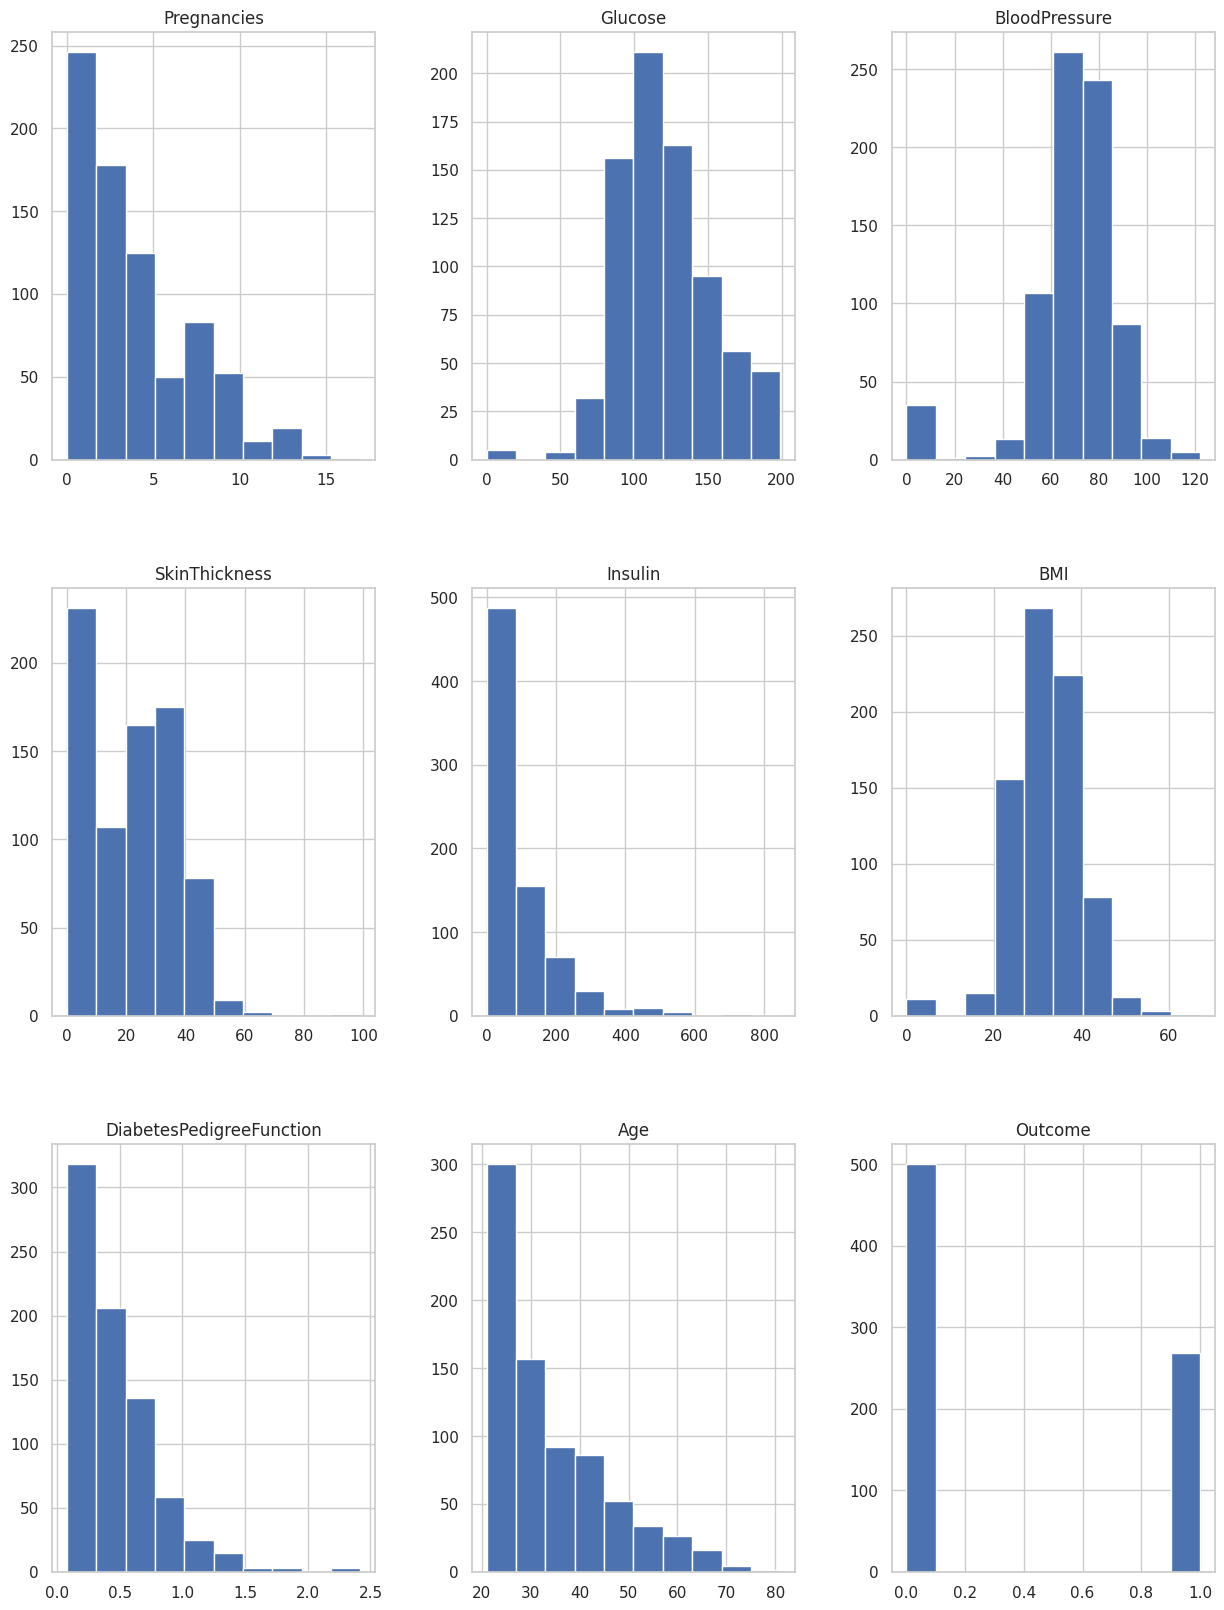

In [ ]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [ ]:
# Outcome 열을 제거, head() 메서드를 사용해 처음 5행을 출력
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# 데이터프레임 출력
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Outcome 변수의 클래스 개수를 확인
y=df['Outcome']
y.value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
# 전체 데이터의 25%를 테스트 세트로 사용, 75%는 훈련 세트로 사용
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델: 이진 분류 문제
from sklearn.svm import SVC # Support Vector Machine 모델
from sklearn.neural_network import MLPClassifier # 다층 퍼셉트론 분류기
from sklearn.tree import DecisionTreeClassifier # 결정 트리 분류기
from sklearn.metrics import accuracy_score # 정확도 계산, 모델 성능 평가
from sklearn.metrics import confusion_matrix # 혼동 행렬을 계산, 분류 모델의 성능을 자세히 분석

## **1. SVM**

In [ ]:
clf_svm = SVC(random_state=0) # SVM 분류기 객체 생성
clf_svm.fit(X_train, y_train) # 훈련 데이터 X_train과 타겟 데이터 y_train을 사용하여 SVM 모델을 학습

pred_svm = clf_svm.predict(X_test) # 학습된 SVM 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행, 결과를 저장

print("--- SVM Classifier ---")
print("정확도:", accuracy_score(y_test, pred_svm)) # 테스트 데이터의 실제 값 y_test와 예측 값 pred_svm 간의 정확도를 출력
print("혼동 행렬:\n", confusion_matrix(y_test, pred_svm)) # 혼동 행렬을 계산하고 출력

--- SVM Classifier ---
정확도: 0.7708333333333334
혼동 행렬:
 [[119  11]
 [ 33  29]]


## **2. LR**

In [ ]:
clf_lr = LogisticRegression(random_state=0) # LR 분류기 객체 생성
clf_lr.fit(X_train, y_train) # 훈련 데이터 X_train과 타겟 데이터 y_train을 사용하여 LR 모델을 학습

pred_lr = clf_lr.predict(X_test) # 학습된 LR 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행, 결과를 저장

print ("--- Logistic Regression Classifier ---")
print ("정확도:", accuracy_score(y_test, pred_lr)) # 테스트 데이터의 실제 값 y_test와 예측 값 pred_lr 간의 정확도를 출력
print ("혼동 행렬:\n", confusion_matrix(y_test, pred_lr)) # 혼동 행렬을 계산하고 출력

--- Logistic Regression Classifier ---
정확도: 0.7916666666666666
혼동 행렬:
 [[115  15]
 [ 25  37]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **3. RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier를 사용하기 위해 클래스를 임포트
from sklearn.metrics import accuracy_score # 정확도 계산
# 경고 메시지를 무시
import warnings
warnings.filterwarnings('ignore')

clf_rf = RandomForestClassifier(random_state=0) # RF 분류기 객체 생성
clf_rf.fit(X_train, y_train) # 훈련 데이터 X_train과 타겟 데이터 y_train을 사용하여 RF 모델을 학습

pred_rf = clf_rf.predict(X_test) # 학습된 RF 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행, 결과를 저장

print ("--- Radom Forest ---")
print("정확도:", accuracy_score(y_test,pred_rf)) # 테스트 데이터의 실제 값 y_test와 예측 값 pred_rf 간의 정확도를 출력
print (confusion_matrix(y_test, pred_rf)) # 혼동 행렬을 계산하고 출력

--- Radom Forest ---
정확도: 0.7708333333333334
[[116  14]
 [ 30  32]]


## **4. DT**

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=0) # DT 분류기 객체 생성
clf_dt.fit(X_train, y_train) # 훈련 데이터 X_train과 타겟 데이터 y_train을 사용하여 DT 모델을 학습

pred_dt = clf_dt.predict(X_test) # 학습된 DT 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행, 결과를 저장

print ("--- Decision Tree Classifier ---")
print ("정확도:", accuracy_score(y_test, pred_dt)) # 테스트 데이터의 실제 값 y_test와 예측 값 pred_dt 간의 정확도를 출력
print ("혼동 행렬:\n", confusion_matrix(y_test, pred_dt)) # 혼동 행렬을 계산하고 출력

--- Decision Tree Classifier ---
정확도: 0.71875
혼동 행렬:
 [[102  28]
 [ 26  36]]


## **5. KNN**

In [ ]:
# KNN 분류기 초기화
knn = KNeighborsClassifier(n_neighbors=5) # KNN 분류기 객체 생성
knn.fit(X_train, y_train) # 훈련 데이터 X_train과 타겟 데이터 y_train을 사용하여 KNN 모델을 학습

pred_knn = knn.predict(X_test) # 학습된 KNN 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행, 결과를 저장

print("--- K-Nearest Neighbors ---")
print("정확도:", accuracy_score(y_test, pred_knn)) # 테스트 데이터의 실제 값 y_test와 예측 값 pred_knn 간의 정확도를 출력
print("혼동 행렬:\n", confusion_matrix(y_test, pred_knn)) # 혼동 행렬을 계산하고 출력

--- K-Nearest Neighbors ---
정확도: 0.7552083333333334
혼동 행렬:
 [[109  21]
 [ 26  36]]
